In [1]:
#Importing the necessory Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2hsv
from skimage import io
from skimage import data
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift
import os.path
import glob
from tqdm import tqdm_notebook
import cv2
import copy

In [2]:
main_dir=r'C:\Users\Muhammad Uzair\Desktop\frames\\'
my_list=glob.glob(main_dir+ '*')
my_list

['C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00001.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00011.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00021.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00031.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00041.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00051.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00061.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00071.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00081.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00091.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00101.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00111.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00121.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00131.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00141.png',
 'C:\\Users\\Muhammad Uzair\\Desktop\\frames\\omgg00151.png',
 'C:\\Us

In [3]:
list_names=sorted(my_list)
list_names=my_list

In [12]:
#make empty image
# empty=np.zeros((18000,25000,3))
empty=np.zeros((15000,45000,3))
empty=empty.astype(np.uint8)

In [13]:
#initial position pointer for width and height
# last_height_position=16500
# last_width_position=17000
last_height_position=2500
last_width_position=3000
#first time we need to place a full image at start
im=io.imread(list_names[0])
empty[last_height_position:last_height_position+im.shape[0],last_width_position:im.shape[1]+last_width_position,:]=im
last_width_position=im.shape[1]+last_width_position
#This is the main loop where all the upcoming images are stitched together
x=0
idx1 = int(0)
idx2 = int(1)
for i in range(len(list_names)-3):
    x=x+1
    #read the first two images (consecutive images)
    print(idx1,idx2)
    im1=io.imread(list_names[idx1])
    im2=io.imread(list_names[idx2])
    
    shift, error, diffphase = register_translation(im1, im2)
    print("offset y, x = ", shift[0], ", ", shift[1])
    if(abs(shift[0]) < 100 and abs(shift[1]) < 500):
        idx2+=1
    else:
    # shift[1] refers to the width change pixel amount between two images
    #if shift[1]>0 means that new uncommon region from image2 
    #must be added from right side ending point of image1
    #and vice versa
        if (shift[1]>=0):
            print('Right movement')
            last_height_position=last_height_position+int(shift[0])
            last_width_position=int(shift[1])+last_width_position
            p = np.where(empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] > 1, 0, 1).astype(np.float32)
            p1 = np.where(p==0, 0.5, p).astype(np.float32)
            empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] += (p*im2).astype(np.uint8)
            a = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
            empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] = im2
            b = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
            c = np.ones(a.shape).astype(np.float32)
            c[100:-100,100:-100,:] = p1
            blur = cv2.GaussianBlur(c, (201,201), 100)
            blur_inv = 1-blur
            reconstructed = (a*blur).astype(np.uint8) + (b*blur_inv).astype(np.uint8)
            empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:] = reconstructed

        elif (shift[1]<0):
            last_height_position=last_height_position+int(shift[0])
            last_width_position=last_width_position+int(shift[1])
            # empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:]=0.5*empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:]+(p*im2).astype(np.uint8)
            p = np.where(empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] > 1, 0, 1).astype(np.float32)
            p1 = np.where(p==0, 0.5, p).astype(np.float32)
            empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] += (p*im2).astype(np.uint8)
            a = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
            empty[last_height_position:last_height_position+im2.shape[0],last_width_position-im2.shape[1]:last_width_position,:] = im2
            b = copy.copy(empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:])
            c = np.ones(a.shape).astype(np.float32)
            c[100:-100,100:-100,:] = p1
            blur = cv2.GaussianBlur(c, (201,201), 100)
            blur_inv = 1-blur
            reconstructed = (a*blur).astype(np.uint8) + (b*blur_inv).astype(np.uint8)
            empty[last_height_position-100:last_height_position+im2.shape[0]+100,last_width_position-im2.shape[1]-100:last_width_position+100,:] = reconstructed
        
        idx1 = idx2
        idx2 = idx1 + 1
    print(last_width_position)
    if(x==20):
        x=0

    plt.show()

0 1
offset y, x =  -2.0 ,  58.0
4920
0 2
offset y, x =  -4.0 ,  116.0
4920
0 3
offset y, x =  -10.0 ,  249.0
4920
0 4
offset y, x =  -18.0 ,  410.0
4920
0 5
offset y, x =  -27.0 ,  619.0
Right movement
5539
5 6
offset y, x =  -7.0 ,  154.0
5539
5 7
offset y, x =  -15.0 ,  318.0
5539
5 8
offset y, x =  -19.0 ,  421.0
5539
5 9
offset y, x =  -30.0 ,  670.0
Right movement
6209
9 10
offset y, x =  -8.0 ,  186.0
6209
9 11
offset y, x =  -14.0 ,  312.0
6209
9 12
offset y, x =  -27.0 ,  612.0
Right movement
6821
12 13
offset y, x =  -6.0 ,  138.0
6821
12 14
offset y, x =  -10.0 ,  176.0
6821
12 15
offset y, x =  -17.0 ,  348.0
6821
12 16
offset y, x =  -21.0 ,  441.0
6821
12 17
offset y, x =  -32.0 ,  653.0
Right movement
7474
17 18
offset y, x =  -7.0 ,  142.0
7474
17 19
offset y, x =  -24.0 ,  509.0
Right movement
7983
19 20
offset y, x =  -1.0 ,  108.0
7983
19 21
offset y, x =  -5.0 ,  156.0
7983
19 22
offset y, x =  -17.0 ,  439.0
7983
19 23
offset y, x =  -21.0 ,  528.0
Right movement
85

offset y, x =  25.0 ,  -466.0
26370
178 180
offset y, x =  31.0 ,  -593.0
25777
180 181
offset y, x =  6.0 ,  -112.0
25777
180 182
offset y, x =  -1.0 ,  -50.0
25777
180 183
offset y, x =  1.0 ,  -56.0
25777
180 184
offset y, x =  17.0 ,  -420.0
25777
180 185
offset y, x =  30.0 ,  -696.0
25081
185 186
offset y, x =  13.0 ,  -300.0
25081
185 187
offset y, x =  28.0 ,  -602.0
24479
187 188
offset y, x =  16.0 ,  -351.0
24479
187 189
offset y, x =  36.0 ,  -748.0
23731
189 190
offset y, x =  12.0 ,  -258.0
23731
189 191
offset y, x =  33.0 ,  -710.0
23021
191 192
offset y, x =  19.0 ,  -394.0
23021
191 193
offset y, x =  27.0 ,  -588.0
22433
193 194
offset y, x =  17.0 ,  -370.0
22433
193 195
offset y, x =  27.0 ,  -573.0
21860
195 196
offset y, x =  27.0 ,  -560.0
21300
196 197
offset y, x =  11.0 ,  -270.0
21300
196 198
offset y, x =  31.0 ,  -764.0
20536
198 199
offset y, x =  -2.0 ,  6.0
20536
198 200
offset y, x =  10.0 ,  -211.0
20536
198 201
offset y, x =  36.0 ,  -778.0
19758
201

21308
356 359
offset y, x =  -14.0 ,  316.0
21308
356 360
offset y, x =  -18.0 ,  392.0
21308
356 361
offset y, x =  -19.0 ,  436.0
21308
356 362
offset y, x =  -33.0 ,  742.0
Right movement
22050
362 363
offset y, x =  0.0 ,  11.0
22050
362 364
offset y, x =  -3.0 ,  84.0
22050
362 365
offset y, x =  -18.0 ,  407.0
22050
362 366
offset y, x =  -27.0 ,  560.0
Right movement
22610
366 367
offset y, x =  0.0 ,  24.0
22610
366 368
offset y, x =  -23.0 ,  522.0
Right movement
23132
368 369
offset y, x =  -21.0 ,  412.0
23132
368 370
offset y, x =  -39.0 ,  808.0
Right movement
23940
370 371
offset y, x =  -3.0 ,  71.0
23940
370 372
offset y, x =  -15.0 ,  346.0
23940
370 373
offset y, x =  -17.0 ,  378.0
23940
370 374
offset y, x =  -23.0 ,  533.0
Right movement
24473
374 375
offset y, x =  -20.0 ,  431.0
24473
374 376
offset y, x =  -27.0 ,  547.0
Right movement
25020
376 377
offset y, x =  0.0 ,  28.0
25020
376 378
offset y, x =  -16.0 ,  380.0
25020
376 379
offset y, x =  -25.0 ,  572.0

Right movement
9274
536 537
offset y, x =  113.0 ,  6.0
Right movement
9280
537 538
offset y, x =  56.0 ,  1.0
9280
537 539
offset y, x =  252.0 ,  13.0
Right movement
9293
539 540
offset y, x =  5.0 ,  -2.0
9293
539 541
offset y, x =  115.0 ,  0.0
Right movement
9293
541 542
offset y, x =  44.0 ,  5.0
9293
541 543
offset y, x =  35.0 ,  18.0
9293
541 544
offset y, x =  -116.0 ,  0.0
Right movement
9293
544 545
offset y, x =  -12.0 ,  284.0
9293
544 546
offset y, x =  -20.0 ,  454.0
9293
544 547
offset y, x =  -27.0 ,  579.0
Right movement
9872
547 548
offset y, x =  -1.0 ,  0.0
9872
547 549
offset y, x =  0.0 ,  -5.0
9872
547 550
offset y, x =  0.0 ,  -8.0
9872
547 551
offset y, x =  -18.0 ,  414.0
9872
547 552
offset y, x =  -35.0 ,  792.0
Right movement
10664
552 553
offset y, x =  -1.0 ,  4.0
10664
552 554
offset y, x =  -14.0 ,  312.0
10664
552 555
offset y, x =  -40.0 ,  862.0
Right movement
11526
555 556
offset y, x =  -1.0 ,  7.0
11526
555 557
offset y, x =  -25.0 ,  542.0
Righ

ValueError: could not broadcast input array from shape (1088,1920,3) into shape (1088,1873,3)

In [16]:
plt.imsave(r'Desktop\plz1.tiff',empty)

MemoryError: Integer overflow in ysize

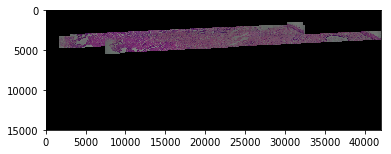

In [14]:
plt.imshow(empty)

In [3]:
skimage.feature.register_translation

NameError: name 'skimage' is not defined